# Interative statistics workbook
Parikshit Sanyal

'কতটা পথ পেরলে তবে পথিক বলা যায়?' একটা শব ব্যবচ্ছেদ করেই কি বলা উচিৎ - 'সবার দুটো ফিমার থাকে?' সবাইকে কেটে দেখতে পারলে নিশ্চয়ই খুব ভাল হত । তার বদলে কয়েকটা মাত্র কাটলাম, তাতে কতটা ভুল হল ? 'ভুল' কি? মাছের মাথা খেলে কি বুদ্ধি বাড়ে? যদি ধরেই নি বাড়ে, তাহলে এই সিদ্ধান্ত ভুল হওয়ার সম্ভাবনা কত? মাছের মাথা খেয়ে যাদের বুদ্ধি বেড়েছে তাদেরও কি দুটো ফিমার থাকে? 

এসমস্ত প্রশ্নের উত্তর চট করে হয়না । অতএব হাতে রইল পেন্সিল ।

"How many roads must a man walk down  
Before you call him a man?  
How many seas must a white dove sail  
Before she sleeps in the sand?  
How many times must the cannon balls fly  
Before they're forever banned?  
The answer, my friend, is blowin' in the wind  
The answer is blowin' in the wind"  

(Bob Dylan, 1962)

Statistics only plausible answer to all such queries that involve numbers.

## মাপজোক | Measurements

সব মাপ সমান নয় । Not all measures are equal

1. ratio scale - যেমন অঙ্ক পরীক্ষার নম্বর, যার ভগ্নাংশ হয় (একশোয় সাড়ে চুয়াত্তর) , আর (দুর্ভাগ্যক্রমে) শূন্যও হতে পারে। Exam scores might have any fractional value, or even (sigh) zero.
2. interval scale - যেমন দৈর্ঘ্য, যার ভগ্নাংশ আছে কিন্তু শূন্য নেই । Length, which can be a fraction, but never zero
3. ordinal scale - যার ভগ্নাংশ নেই, যেমন grade 1, 2, 3 । এক্ষেত্রে সংখ্যা গুলো ঠিক সংখ্যা নয়, অর্থাৎ 3 - 2 ≠ 2 - 1 । When using such a scale, we use numbers, but not in their usual sense: grade 1 is not exactly as better than 2, as is grade 2 than 3, i.e. this scale does not have the property of equal intervals.
4. nominal scale - যেমন বর্ণানুক্রমিক রোল নাম্বার: এই পদ্ধতিতে অবিনাশ সবসময়ই 'ফার্স্ট বয়' হবে, কারণ তার নাম Ab দিয়ে শুরু । এক্ষেত্রে রোল ১, ২ ,৩ এই সংখ্যাগুলো অর্থহীন । If ranking students by alphabetical order, the numbers 1,2,3 lose all their meaning: they serve only as 'labels

In [2]:
# Import all required libraries 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!jupyter nbextension enable --py widgetsnbextension
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from collections import Counter
import math
from scipy import stats
import pandas as pd
from sklearn import linear_model, metrics
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from statsmodels.tools import categorical
plt.style.use('seaborn')
np.random.seed(42)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


# Load a demo dataset

This data is a demo table of numeric and categorical variables.

In [0]:
sepsis_data = pd.read_csv('https://www.dropbox.com/s/xv1z3wsncjxi40q/sepsis_train_data.csv?dl=1')
sepsis_data

,TLC,PLT,INR,FIBRONOGEN,D_DIMER,APTT,CLOT_RATE,PLTFN,ACT,SMOKER,SEPSIS
0,14800,92000,1.32,3.3,800,34,43.0,3.6,125,N,1
1,17000,122000,1.22,1.7,1200,34,10.1,2.2,219,O,1
2,15000,88000,1.40,2.1,5000,38,24.0,3.0,54,M,1
3,9500,62000,1.50,1.0,3000,38,11.2,1.4,188,H,1
4,12000,120000,1.20,0.8,480,34,24.0,3.4,68,H,1
...,...,...,...,...,...,...,...,...,...,...,...
95,3000,318000,1.20,0.8,1500,38,31.0,3.2,174,N,0
96,7400,220000,1.80,0.9,1600,33,30.0,2.9,138,N,0
97,8100,352000,1.90,1.4,1800,34,30.0,3.2,190,M,0
98,9200,168000,1.20,1.4,1900,32,25.0,3.1,180,N,0


# Descriptive statistics

## Frequency distribution

একটা ক্লাসের সবার দৈর্ঘ্য মাপলে যদি পাওয়া যায় \[130, 125, 138, 144, 162, 133, 142, 138, 148,144, 162,184, 156, 152, 146, 164, 156] তাহলে এর থেকে কতরকম লেখচিত্র আঁকা যায়?

The heights of children in a class is \[130, 125, 138, 144, 162, 133, 142, 138, 148,144, 162, 184, 156, 152, 146, 164, 156] cm

### Frequency distribution table

| Height | Number of children
|--------|-------
|130     | 1
|125     | 1
|138     | 1
|144     | 2
|162     | 1
|133     | 1
|142     | 1
|138     | 1
|148     | 1
|162     | 1
|156     | 2
|152     | 1
|146     | 1
|164     | 1
|184     | 1

### Histogram

In [0]:
X=  [130, 125, 138, 144, 162, 133, 142, 138, 148,144, 162, 184,156, 152, 146, 164, 156]
@interact
def basic_histogram(bins=(2,10,1)):
    plt.xlabel('Height')
    plt.ylabel('Number of students')
    plt.title('Histogram of shoe sizes: drag slider to adjust number of bins')
    plt.hist(X,bins=bins)

interactive(children=(IntSlider(value=6, description='bins', max=10, min=2), Output()), _dom_classes=('widget-…

In [0]:
np.percentile(X,[25,50,75]) # Resturn a list of percentiles

array([138., 146., 156.])

### Boxplots

Boxplots partition the data depending on four 'quantiles'

* "minimum" (which is actually Q1 - 1.5xIQR)
* Q1
* Q3
* "maximum (Q3 + 1.5xIQR)

The difference between Q3 - Q1 = IQR (interquartile range). Note that while plotting a boxplot, "minimum" and "maximum" don't have their usual meaning. Any value outside this defined "minimum" or "maximum" is an outlier.

In [0]:
X=  [130, 125, 138, 144, 162, 133, 142, 138, 148,144, 162, 156, 152, 146, 164, 156]
def summary_data(X):
  return (np.min(X), np.quantile(X,0.25), np.median(X), np.quantile(X,0.75), np.max(X))
(minimum, Q1, median, Q3, maximum) = summary_data(X)
print("min %s Q1 %s median %s Q3 %s max %s" % (minimum, Q1, median, Q3, maximum))

min 125 Q1 138.0 median 146.0 Q3 156.0 max 184


In [0]:
#Boxplot
# Slide max and min value to see when an outlier appears
X=  [130, 125, 138, 144, 162, 133, 142, 138, 148,144, 162, 156, 152, 146, 164, 156]
@interact
def plot_boxplot_from_data(max_value=(160,200,1),min_value=(100,150,1)):
  X.append(max_value)
  X.append(min_value)
  (minimum, Q1, median, Q3, maximum) = summary_data(X)
  X_bar = np.mean(X) #average of X
  X_median = np.median(X) #median
  plt.boxplot(X)
  plt.text(1+0.1, X_median, "median")
  plt.text(1+0.1, Q1, "Q1")
  plt.text(1+0.1, Q3, "Q3")
  plt.text(1+0.3,Q3 + 1.55*(Q3-Q1), "Outlier")
  plt.text(1+0.3,Q1 - 1.55*(Q3-Q1), "Outlier")
  plt.text(1-0.2, (Q1+Q3) / 2, "IQR",color='r')
  plt.vlines(1-0.1,Q1,Q3,color='r')
  plt.ylim(90,210)
  plt.title('Boxplot of X')

interactive(children=(IntSlider(value=180, description='max_value', max=200, min=160), IntSlider(value=125, de…

### Measures of central tendency

In [0]:
print("Mean %s median %s mode %s" % (np.round(np.mean(X),2), np.median(X), max(set(X), key=X.count)))
# i.e. round mean to two decimal places, print mean and median, then find mode by looking for the most frequent value

Mean 148.47 median 146.0 mode 162


### Measures of dispersion

In [0]:
X_range = np.max(X) - np.min(X)
X_md = np.round((np.sum(X - np.mean(X))) / len(X),2) # mean deviation
X_var = np.round(np.var(X),2) # variance
X_std = np.round(np.std(X),2) # standard deviation
print("Range %s Mean deviation %s Variance %s Standard deviation %s" % (X_range, X_md, X_var, X_std))

Range 59 Mean deviation 0.0 Variance 202.01 Standard deviation 14.21


### Formal definitions


1. variable $X$
2. population size $\eta$
2. mean of population $\mu$
2. median
3. mode
4. variance of population 
$$ σ^2 = \frac {∑ (X − \mu)^2} {η} $$
5. variance of sample of size $n$ (Bessel's correction)
$$ s^2 = \frac {∑ (X − \mu)^2 }{n - 1} $$
6. standard deviation = $\sqrt{variance}$

#### Why n-1? (Bessel's correction)

See a book on statistics for mathematical proof. It will suffice to say that when sample size is < 40, the correction gives sample variance closer to actual population variance.

In [0]:
# Bessel's correction
@interact
def bessels_correction(n=(10,200,10)): # n in sample size
  eta = 10000
  pop = np.random.randint(0,50,eta)
  sample = np.random.choice(pop,n)
  print("Sample size: %s" % n)
  print("Population mean %s" % np.mean(pop))
  print("Sample mean %s" % np.mean(sample))
  mu = np.mean(pop)
  xbar = np.mean(sample)
  var_s = np.sum(((sample - xbar)**2)/n)
  var_pop = np.sum(((pop - mu)**2)/eta)
  var_s_corrected = np.sum(((sample - xbar)**2)/(n-1))

  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.boxplot([pop,sample],labels=["Population","Sample"])

  plt.subplot(1,2,2)
  plt.plot(var_pop,'bo',label="Actual population variance")
  plt.plot(var_s,'go',label="Sample variance without correction")
  plt.plot(var_s_corrected,'ro',label="Sample variance with correction")
  plt.text(0,var_pop,"Actual population variance")
  plt.text(0,var_s,"Sample variance without correction")
  plt.text(0,var_s_corrected,"Sample variance with correction")
  plt.show()
  print("Variance derived from sample %s" % var_s)
  print("Variance derived from population %s" % var_pop)
  print("Variance derived from sample with Bessel's correction %s" % var_s_corrected)

interactive(children=(IntSlider(value=100, description='n', max=200, min=10, step=10), Output()), _dom_classes…

## Central limit theorem

স্পষ্টতই, সবার ব্যাপারে সবকিছু জানা অসম্ভব । তাহলে sampling নয়, census করতে হবে । তাহলে একটা মাত্র sample থেকে পুরো population এর ব্যাপারে কি কিছুই আন্দাজ করা যাবে ।

যদি একটা ক্লাসের গড় দৈর্ঘ্য হয় 160 cm, তাহলে ওই ক্লাস থেকে যেকোন 20 জন কে বেছে নিলে, তাদের গড়টাও এই 160 এর কাছাকাছি হবে । এই ধারণাটাকে অঙ্কের ভাষায় কিকরে লেখা যায়?

যাকে common sense বলি, sample size বাড়তে থাকলে সেটাই একসময় সূত্র (theorem) হয়ে যায় ।

In [0]:
@interact
def plot_sample_means(eta=(10,1000,100),n=(10,100,10),k=(10,100,10),bins=(10,100,10)):
    X = np.random.sample(eta) # eta is size of entire population
    samples_drawn = []
    sample_means = []
    for i in range(k): # k is number of times sampling is done
        sample_drawn = np.random.choice(X,size=n) # n is sample size
        samples_drawn.append(sample_drawn)
    sample_means = [np.mean(s) for s in samples_drawn]
    mu = np.round(np.mean(X),4)
    sigma = np.round(np.std(X),4)
    mu_xbar = np.round(np.mean(sample_means),4)
    s_xbar = np.round(np.std(sample_means),4)
   
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.hist(X,bins=bins)
    plt.axvline(x=mu,label="Mean of original population",color='r')
    plt.hlines(y=5,xmin=mu,xmax=mu+sigma,label="SD of original",color='k')
    plt.title("Original population")
    plt.xlim(0,1)
    plt.legend(loc='best')

    plt.subplot(1,2,2)
    plt.xlim(0,1)
    plt.hist(sample_means,bins=bins)
    plt.axvline(x=mu_xbar,label="Mean of sample means",color='y')
    plt.hlines(y=6,xmin=mu_xbar,xmax=mu_xbar+s_xbar,label="SD of sampling distribution",color='c')
    plt.title("Histogram of the sample means (sampling distribution)")
    plt.legend(loc='best')
    plt.show()
    print("Mean of original population mu: %s" % mu)
    print("SD of original population sigma: %s" % sigma)
    print("Value of sigma/sqrt(n): **%s**" % np.round((sigma/ math.sqrt(n)),2))
    print("Mean of sampling distribution Xbar: %s" % mu_xbar)
    print("SD of sampling distribution sxbar: **%s**" % s_xbar)

interactive(children=(IntSlider(value=410, description='eta', max=1000, min=10, step=100), IntSlider(value=50,…

The 'normal curve' is the plot of the **means** generated from random samples from a population, when sampling has been done an __infinite__ number of times

**Central limit theorem** - The means of infinite random samples drawn from an infinitely large population are __normally distributed__, whose 

* mean is about the same as population mean $ \mu $
* standard deviation is $ \sigma / \sqrt n $, where n is sample size, $ \sigma $ is the SD of the original population

### Standard normal distribution

The following shows the areas under the normal curve while you move around 'Z'.

In [0]:
#The theoretical normal distribution
#Only expect accurate results when N is very high, i.e. near infinity
@interact
def plot_normal_curve(mu=(-5,5,1),sigma=(0.1,2,0.1),N=(10,10000,10),Z='1'):
  Z=float(Z)
  X = np.random.normal(mu,sigma,N) 
  y = ( 2.*np.pi*sigma**2. )**-0.5 * np.exp( -.5 * (X-mu)**2. / sigma**2. )
  plt.scatter(X,y,marker='.')
  plt.axvline(x=mu,color='r',label='Mean')
  plt.hlines(0.5,mu,mu+sigma,color='k',label='SD')
  plt.axvline(x=mu+sigma,color='g')
  plt.axvline(x=mu-sigma,color='g')
  plt.axvline(x=mu+2*sigma,color='g')
  plt.axvline(x=mu-2*sigma,color='g')
  plt.axvline(x=Z,color='y',label="+Z")
  plt.axvline(x=-Z,color='y',label='-Z')

  selected_items = []
  y_between_z = []
  combined_array = np.dstack((X,y))
  for item in combined_array[0]:
    if item[0] >= -Z and item[0] <= Z:
      selected_items.append(item)
  for item in selected_items:
    plt.vlines(x=item[0],ymin=0,ymax=item[1],color='#aabbcc')
    y_between_z.append(item[1])
  area_between_z = np.round(len(y_between_z)/len(y),3)
  plt.text(0,0.3,area_between_z,color='k')
  plt.legend(loc='best')
  print("Area between -Z and +Z : %s" % area_between_z)
  print("Area to right of +Z: %s" % (0.5-area_between_z/2))
  print("Area to left of +Z: %s" % (0.5 + area_between_z/2))

interactive(children=(IntSlider(value=0, description='mu', max=5, min=-5), FloatSlider(value=1.0, description=…

In [0]:
# Calculate area above Z from library
@interact
def calculate_area_above_z(Z='0'):
  Z = float(Z)
  area_left = stats.norm.cdf(Z)
  area_right = 1 - area_left
  print("Area of normal curve to the right of Z %s" % area_right)
  print("Area of normal curve to the left of Z %s" % area_left)
  print("Area of normal curve between -Z and +Z %s" % (area_left - area_right))
  X = np.arange(-5,5,0.01)
  y = ( 2.*np.pi*1**2. )**-0.5 * np.exp( -.5 * (X-0)**2. / 1**2. )
  plt.scatter(X,y,marker='.')
  plt.axvline(x=Z,color='r')
  X_right_of_Z = np.asarray([item for item in X if item >= Z])
  y_right_of_Z = ( 2.*np.pi*1**2. )**-0.5 * np.exp( -.5 * (X_right_of_Z-0)**2. / 1**2. )
  plt.fill_between(X_right_of_Z,0,y_right_of_Z,color='r',alpha=0.3)
  plt.text(Z,0.05,np.round(area_right,3))
  plt.text(0,0.05,np.round(area_left,3))

interactive(children=(Text(value='0', description='Z'), Output()), _dom_classes=('widget-interact',))

In [0]:
# Calculate Z from given area
@interact
def calculate_z_from_area(area='0.5'):
  area = float(area)
  Z_for_area_to_left_of_Z = stats.norm.ppf(area)
  Z_for_area_both_sides_of_Z = stats.norm.ppf((1+area)/2)
  print("Area left of Z %s is %s" % (Z_for_area_to_left_of_Z,area))
  print("Area between -Z %s and +Z %s is %s" % (Z_for_area_both_sides_of_Z,Z_for_area_both_sides_of_Z,area))
  X = np.arange(-5,5,0.01)
  y = ( 2.*np.pi*1**2. )**-0.5 * np.exp( -.5 * (X-0)**2. / 1**2. )

  plt.figure(figsize=(15,5))
  plt.subplot(121)
  plt.scatter(X,y,marker='.')
  plt.vlines(x=Z_for_area_to_left_of_Z,ymin=0,ymax= 0.5,color='r')
  X_right_of_Z = np.asarray([item for item in X if item >= Z_for_area_to_left_of_Z])
  y_right_of_Z = ( 2.*np.pi*1**2. )**-0.5 * np.exp( -.5 * (X_right_of_Z-0)**2. / 1**2. )
  plt.fill_between(X_right_of_Z,0,y_right_of_Z,color='r',alpha=0.3)
  plt.title("Area left of Z")
  plt.text(0,0.1,area)
  plt.text(Z_for_area_to_left_of_Z,0.2,"Z=%s" % np.round(Z_for_area_to_left_of_Z,3))

  plt.subplot(122)
  plt.scatter(X,y,marker='.')
  X_left_of_minus_Z = np.asarray([item for item in X if item <= -Z_for_area_both_sides_of_Z])
  y_left_of_minus_Z = ( 2.*np.pi*1**2. )**-0.5 * np.exp( -.5 * (X_left_of_minus_Z-0)**2. / 1**2. )
  X_right_of_plus_Z = np.asarray([item for item in X if item >= Z_for_area_both_sides_of_Z])
  y_right_of_plus_Z = ( 2.*np.pi*1**2. )**-0.5 * np.exp( -.5 * (X_right_of_plus_Z-0)**2. / 1**2. )
  plt.vlines(x=-Z_for_area_both_sides_of_Z,ymin=0,ymax= 0.5,color='r')
  plt.vlines(x=Z_for_area_both_sides_of_Z,ymin=0,ymax= 0.5,color='r')
  plt.fill_between(X_left_of_minus_Z,0,y_left_of_minus_Z,color='r',alpha=0.3)
  plt.fill_between(X_right_of_plus_Z,0,y_right_of_plus_Z,color='r',alpha=0.3)
  plt.title("Area between -Z and +Z")
  plt.text(0,0.1,area)
  plt.text(-Z_for_area_both_sides_of_Z-1,0.2,"Z= %s" % np.round(-Z_for_area_both_sides_of_Z,2))
  plt.text(Z_for_area_both_sides_of_Z,0.2,"Z =  %s" % np.round(Z_for_area_both_sides_of_Z,2))


interactive(children=(Text(value='0.5', description='area'), Output()), _dom_classes=('widget-interact',))

## Discrete probability distributions

### Bernoulli distribution

যদি একটা কয়েন একবার টস করা হয় তবে তার হেড পড়ার সম্ভাবনা a এবং টেল এর সম্ভাবনা b = 1-a . 

Text(0.5, 1.0, 'Probability distribution of heads of a single coin toss, with inherenr probability of heads = a')

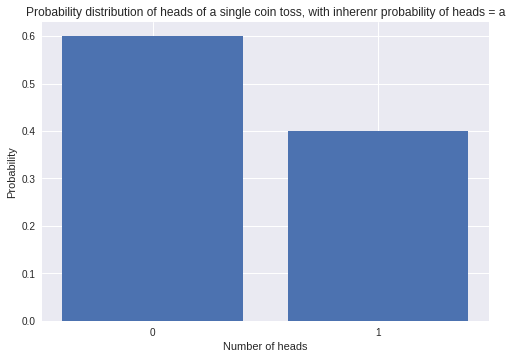

In [0]:
X = [1,0]
PX = [0.4,0.6]
plt.xticks([0,1])
plt.bar(X,PX)
plt.xlabel("Number of heads")
plt.ylabel("Probability")
plt.title("Probability distribution of heads of a single coin toss, with inherenr probability of heads = 0.4")

### Binomial distribution

যদি এই কয়েন, যার হেডের সম্ভাবনা a এবং টেলের সম্ভাবনা b, ২ বার টস করা হয়, তবে 

1. $ P(HH) = a^2 $
2. $ P(HT) = ab $
3. $ P(TH) = ba $
4. $ P(TT) = b^2 $

এবার ছবি । X অক্ষে থাকবে কতবার হেড পড়ল (0,1,2) আর Y অক্ষে ততবার হেড পড়ার সম্ভাবনা । 

Text(0.5, 1.0, 'Probability distribution of 2 tosses of a coin')

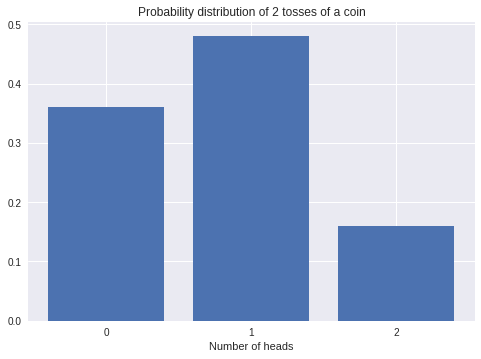

In [0]:
#Binomial distrib
a = 0.6
b = 1-a
X = [0,1,2]
PX = [a**2, 2*a*b, b**2]
plt.xticks([0,1,2])
plt.bar(X,PX)
plt.xlabel("Number of heads")
plt.title("Probability distribution of 2 tosses of a coin")

n বার টস করলে k বার হেড পড়ার সম্ভাবনা

\begin{equation*}
P(X=k)   = {n \choose k} a^k (1-a)^{ n-k}
\end{equation*}

এবার কয়েন ছেড়ে কাজের কথা । ধরা যাক অ্যাসপিরিন খেলে > 80% মাথাব্যাথা সেরে যায় ( a = 0.8) । এখন কোন নতুন ওষুধ, 'মুণ্ডপাত', দাবি করছে যে তাতে > 95% মাথাব্যাথা সারে । Significant?
Null hypothesis: অ্যাসপিরিন আর এই নতুন ওষুধের কোন তফাত নেই । অর্থাৎ  k = 95 . এক্ষেত্রে n = 100 । অ্যাস্পিরিন খেয়ে ১০০ বার এর মধ্যে পচানব্বই বার (বা বেশি) মাথাব্যাথা সারার সম্ভাবনা = ১০০ র মধ্যে পচানব্বই বার (বা বেশি) 'হেড' পড়ার সম্ভাবনা

$$ P(X=k) = \sum_{i=95}^{100} { 100 \choose i } 0.8^{i} (1-0.8)^{i} $$

In [0]:
p = []
for i in range(95,101):
  p.append(math.factorial(100) * (0.8**i) * (0.2**(100-i)) / (math.factorial(100-i) * math.factorial(i)))
print(sum(p))

# Which is the same as
print(np.sum(stats.binom.pmf(k=np.arange(95,101),n=100,p=0.8)))

1.8680066300324342e-05
1.868006630032481e-05


এই সংখ্যাটা এতই ছোট, যে ধরেই নেওয়া যায় অ্যাসপিরিন খেয়ে 95% মাথাব্যাথা সারবেনা ।

যখন $ n \to \infty $, তখন binomial distribution দেখতে হয়ে যায় normal এর মত, যার mean = na আর SD = $ \sqrt {nab} $ । এই distribution কে লেখা হয় $ \chi $ দিয়ে । 

$$ \chi = \frac {m - na}{\sqrt {nab}} $$

In [0]:
#Normal approximation of binomial distrib
@interact
def normal_approx_binom(n=(10,100,10),a=(0.5,0.9,0.1)):
  b = 1-a
  X = np.arange(1,n+1)
  PX = [(math.factorial(n) * (a**k) * (b**(n-k)) / (math.factorial(n-k)*math.factorial(k))) for k in X]
  plt.bar(X,PX)
  mean = a*n
  sd = math.sqrt(n*a*b)
  plt.title('Binomial distribution')
  plt.xlabel("Number of heads")
  plt.axvline(x=n*a,label="Mean (n*a)",color='r')
  plt.hlines(y=0.1,xmin=n*a,xmax=n*a+math.sqrt(n*a*b),color='g',label='SD √(nab)')
  plt.legend(loc='best')

interactive(children=(IntSlider(value=50, description='n', min=10, step=10), FloatSlider(value=0.6, descriptio…

### Poisson distribution

যখন $ n \to \infty $ এবং $ a \to 0 $ তখন binomial distribution কে লেখা যায় ($ \lambda = na $)

$$ P(X=k) = \frac {\lambda^k e^{−\lambda}} {k !}$$

ধরি কোন রোগের prevalence 1% (a = 0.01) । আমি যদি 50 জন OPD পেশেন্টের মধ্যে তিনজন ওই রুগী পাই, তাহলে কি সেটা significant?

In [0]:
#Poisson distribution
@interact
def plot_poisson(a=(0.001,0.01,0.001),n=50):
  b = 1-a
  X = np.arange(n+1)
  PX = [(math.factorial(n) * (a**k) * (b**(n-k)) / (math.factorial(n-k)*math.factorial(k))) for k in X]
  PX_poisson = [ (((n*a)**k * (math.e)**(-n*a))/math.factorial(k)) for k in X]
  plt.xticks(range(0,n+1,5))
  plt.bar(X,PX,label='Plot of binomial')
  plt.plot(X,PX_poisson,'g',label='Plot of Poisson')
  plt.axvline(n*a,color='r',label='Mean (n*a)')
  plt.legend(loc='best')
  mean = a*n
  sd = math.sqrt(n*a*b)
  z_at_k_1 = (1 - mean) / sd
  print("Z: %s" % z_at_k_1)

interactive(children=(FloatSlider(value=0.005, description='a', max=0.01, min=0.001, step=0.001), IntSlider(va…

# Analysis of categorical variables

## The sampling distribution of a proportion

Let's say we want to find the proportion of smokers in the world ($ \rho $) (note that smoking is a categorical, binomial variable). The distribution of proportions of smokers in these samples is the sampling distribution.

### Central limit theorem for proportions

If you take a whole lot of samples from the population and find the proportion of smokers (c) in each sample, you will find that these proportions (p_1, p_2, p_3 ... p_n) form a normal distribution around the original $ \rho $, i.e. the mean(p_1, p_2, p_3 ... p_n) ~ $ p $.

The standard deviation of this normal distribution of sample proportions, is called **standard error of the proportion**, and will be equal to 

$$ s_p = \sqrt \frac {\rho(1-\rho)} {n} $$

For this theorem to work
1. the samples should be independent
2. each category should be represented in each sample (i.e. you can't have a sample of only smokers)

#### Examples

The proportion of smokers in a popualation is 0.9. What is the probability that in a sample of 200, >95% will be smokers?

The Z-score of the sample proportion, in this case

$$ Z = \frac {p - \rho} { s_p } = \frac { p - \rho } { \sqrt \frac {\rho(1-\rho)} {n}}  = (0.95 - 0.9) / \sqrt { 0.9*0.1/200 }  = 2.35 $$

Which translates to an area to the right of Z = 0.009.

But wait! This is a binomial distribution, so we can also calculate this probability as (r = 95% of 200 = 190)

$$ \sum_{i=r}^{n} {n\choose i} \rho^i (1-\rho)^{n-i} $$

Which can be calculated in R language as `sum(dbinom(190:200,200,0.9))` = 0.008, and in python:

In [0]:
np.sum(stats.binom.pmf(k=np.arange(190,200),n=200,p=0.9))

0.008071249249594419

In [0]:
@interact
def plot_categorical(total_tosses='10',chances_of_heads=(0.1,1,0.1),expected_heads='5'):
  total_tosses, expected_heads = (int(total_tosses),int(expected_heads))
  print("Probability of %s heads or more in %s tosses with a coin having inherent %s chance of heads: %s" % \
        (expected_heads, total_tosses, chances_of_heads, np.sum(stats.binom.pmf(np.arange(expected_heads,total_tosses+1),total_tosses,chances_of_heads))))
  X = np.arange(1,total_tosses+1)
  PX = stats.binom.pmf(X,total_tosses,chances_of_heads)
  plt.bar(X,PX)
  mean = total_tosses*chances_of_heads
  sd = math.sqrt(total_tosses*chances_of_heads*(1-chances_of_heads))
  plt.title('Binomial distribution')
  plt.xlabel("Number of heads")
  plt.axvline(x=mean,label="Mean",color='r')
  plt.axvline(x=expected_heads,label="Expected heads",color='y')
  plt.legend(loc='best')


interactive(children=(Text(value='10', description='total_tosses'), FloatSlider(value=0.5, description='chance…

Note that this won't match exactly with the Z -test, as the binomial becomes close to normal only at high sample sizes, and when both 'heads' and 'tails' are represented in the sample in numbers > 10 (i.e. at least 10 'heads' and at least 10 'tails').
#### Calculating confidence interval

The confidence interval for $ \rho $ can be calculated similarly: find a Z-score for selected $ \alpha $, i.e. for one sided $ \alpha = 0.05 $, Z=1.64. Then

$$ \rho = p \pm Zs_p = 0.8 \pm 1.64{\sqrt {0.8(1-0.8)/200}} $$

So if you get sample proportion 0.8 out of a sample of 200, the confidence interval will be [0.69,0.90]

### Hypothesis testing

Let $ H_0: \rho = 0.6, H_A: \rho > 0.6 $, and our sample proportion p = 0.7 (n = 100).

$$ Z = \frac {p - \rho} {s_r} = \frac {p - \rho} {\sqrt \frac {\rho(1-\rho)} n }  = \frac {0.7 - 0.6} {\sqrt {0.6*0.4/100}} = 2.04 $$

Which corresponds to a one sided p-value 0.02 (significant at $ \alpha = 0.05 $).

### Sample size for assesment of proportion

The margin or error 

$$ d = Zs_p  = Z \sqrt {p(1-p)/n} $$

thus

$$ n = \frac {Z^2 p(1-p)} {d^2} $$

## Inference for difference in proportion between two groups

If the incidence of disease in two groups is p_1 and p_2 (of sample size n_1 and n_2), then their difference is $ p_1 - p_2 $, which would be normally distributed about the population difference between two groups $ \rho_1 - \rho_2 $. The **standard error of difference of proportions** is

$$ s_{pd} = \sqrt { \frac {p_1(1-p_1)} {n_1} + \frac {p_2(1-p_2)} {n_2} } $$

## Relatoin between two categorical variables

### The chi square goodness of fit test

If the distribution of a categorical variable in the population and the sample is as follows

|Category (smokers) | Non | Occasional | Moderate | Heavy
|-------------------|-----|------------|----------|------
|Population | 1212 | 324 | 211 | 67
|Sample | 203 | 56 | 23 | 11

Is this sample representative of the population? We can rewrite the table as per _expected_ number in each category, as per distribution in population.

|Category (smokers) | Non | Occasional | Moderate | Heavy| Total
|-------------------|-----|------------|----------|------|----
|Population | 1212 | 324 | 211 | 67 | 1814
|Sample (observed) | 203 | 56 | 23 | 11 | 293
|Sample (expected) | 196.76 | 52.33 |34.08 | 10.82 | 293 (rounded)

We assume in this case, 
1. data are independent, i.e. each person contributes to only one cell in the table
2. each particular cell must have a minimum number of expected cases (i.e. 5)

We assume that for each category, **the difference in (observed - expected) in each sample itself follows a normal distribution**. This normal distribution of (observed-expected) is denoted by $ \chi $. For _k_ such categories, the distributions sum up, and the degree of freedom is k. 

$$ \chi^2 = \sum_{i=1}^k \frac {(O_i - E_i)^2} {E_i} $$


In [0]:
@interact
def plot_chi_square(k=(1,10,1),bins=(100,1000,100),chisq_observed='0',n=(100,10000,1000)):
  # The function gives right p values only when n is sufficiently high i.e. 10000
  diffs = []
  for i in range(k):
    diff = np.random.normal(0,1,n) # Assuming the observed-expected difference to be standard normally distributed variable
    diffs.append(diff) 
  sq_diffs = [item**2 for item in diffs]
  sq_diffs = np.asarray(sq_diffs)
  chisq = np.sum(sq_diffs,axis=0)
  chisq_observed = float(chisq_observed)
  chisq_above_observed = sum(i > chisq_observed for i in chisq)
  chisq_below_observed = sum(i < chisq_observed for i in chisq)
  print("Above observed chi sq %s " % (chisq_above_observed / len(chisq)))
  print("Below observed chi sq %s" % (chisq_below_observed/ len(chisq)))
  plt.figure(figsize=(15,5))
  plt.hist(chisq,bins=bins)
  plt.title("Chi square distribution: df %s" % k)
  plt.axvline(chisq_observed, label="Observed chi square",color='r')
  plt.legend(loc='best')

interactive(children=(IntSlider(value=5, description='k', max=10, min=1), IntSlider(value=500, description='bi…

Of course, there is a quicker way to find the area above a particular value of chi square in the distribution (the p value)

In [0]:
1 - stats.chi2.cdf(14.9,4) # Area above chi square > 14.9 with df = 4

0.004913181623037222

The goodness-of-fit test for the aforementioned table can be carried out in python

In [0]:
c, p = stats.chisquare(f_obs= [203, 56 , 23 , 11 , 293],\
                f_exp= [196.76, 52.33, 34.08, 10.82,293])   # Array of expected counts
print("Chi square %s p-value %s" % (c,p))

Chi square 4.06057271487033 p-value 0.3978702885532031


The p-value is > 0.05, proving that the null hypothesis is true, i.e. there is no difference between population and sample

### The chi square independence test

For testing the relation of two categorical variables, each with 2 or more levels.

| | Cancer | No cancer | Total
|-|--------|------------|------
|Smoker| 56|11 | 67
|Non smoker | 451 | 2167 | 2618
|Total | 507 | 2178 | 2685

Now, the incidence of cancer as a whole is 507/(2618+67) = 0.188. We assume this is the proportion of cancer among _everybody_, i.e. there is no difference between groups (null hypothesis). Thus we can rewrite the table with _expected_ values in each cell.

| | Cancer | No cancer | Total
|-|--------|------------|------
|Smoker (obs)| 56|11 | 67
|Smoker (exp)| 67*0.188 = 12.596 | 67*(1-0.024) = 54.40
|Non smoker (obs) | 451 | 2167 | 2618
|Non smoker (exp) | 2618*0.188 = 492.184 | 2618*(1-0.024) = 2125.82

The total chi square is (k = number of cells in the table)

$$ \chi^2 = \sum_{i=1}^k \frac {(O_i - E_i)^2} {E_i} $$

And the degree of freedom (rows - 1) x (cols - 1)


In [0]:
data = np.asarray([[56,11],[451,2167]])
print(data)
c, p , df, exp = stats.chi2_contingency(data)
print("Chi square %s\n p-value %s \ndf %s \nexpected frequencies %s" % (c,p,df,exp))

[[  56   11]
 [ 451 2167]]
Chi square 183.48304201478348
 p-value 8.413374673084921e-42 
df 1 
expected frequencies [[  12.65139665   54.34860335]
 [ 494.34860335 2123.65139665]]


## Analysis of numeric variables

### Analysis of variance

Following shows the shoe sizes in three groups

|Nutritional category | Shoe sizes
|---------------------|-----------
|Bad | 6,6.7,8,5.6,6.7,7
|Moderate | 7.2,7,6.8,7.1,6.8,7.1
|Good | 7.4,7.6,6.9,7.1,7.2,7.5


In [0]:
data = pd.DataFrame({'Group':['B','B','B','B','B','B','M','M','M','M','M','M','G','G','G','G','G','G'],\
                     'Shoe_size':[6,6.7,8,5.6,6.7,7,7.2,7,6.8,7.1,6.8,7.1,7.4,7.6,6.9,7.1,7.2,7.5]})
data.groupby('Group').agg({'Shoe_size':['mean','std']})

Shoe_size          
           mean       std
Group                    
B      6.666667  0.833467
G      7.283333  0.263944
M      7.000000  0.167332

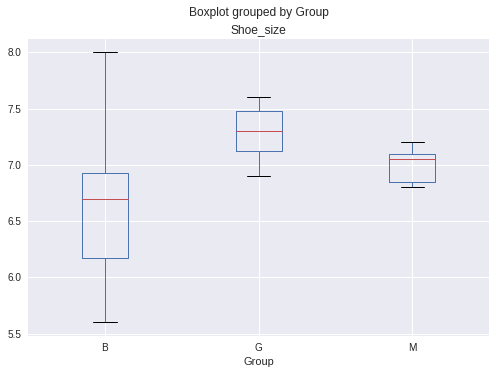

In [0]:
data.boxplot('Shoe_size',by='Group')

In [0]:
# Do ANOVA manually
shoe_size = data[['Shoe_size']].to_numpy()
n = len(data)
SST = np.sum((shoe_size - shoe_size.mean())**2)
print("SST %s" % SST)
groups = list('BMG')
k = len(groups)
SSG = 0
for i in range(len(groups)):
  shoe_sizes_this_group = data.loc[data['Group'] == groups[i], 'Shoe_size'].to_numpy()
  print("Group %s sizes %s " % (groups[i],shoe_sizes_this_group))
  SSG_this_group = np.sum(len(shoe_sizes_this_group)*(shoe_sizes_this_group.mean() - shoe_size.mean())**2)
  #print(SSG_this_group)
  SSG = SSG + SSG_this_group
print("SSG %s " % SSG)
print("%s of variability is due to inter groups (eta square)" % (SSG/SST))

SSE = SST - SSG

df_total = n - 1
df_groups = k - 1
df_error = df_total - df_groups

MSG = SSG / df_groups
MSE = SSE / df_error

print("MSG %s MSE %s" % (MSG, MSE))
print("F %s" % (MSG/MSE))


SST 5.105000000000001
Group B sizes [6.  6.7 8.  5.6 6.7 7. ] 
Group M sizes [7.2 7.  6.8 7.1 6.8 7.1] 
Group G sizes [7.4 7.6 6.9 7.1 7.2 7.5] 
SSG 1.143333333333335 
0.22396343454129966 of variability is due to inter groups
MSG 0.5716666666666675 MSE 0.2641111111111111
F 2.1644930584770754


In [0]:
# Automated method
mod = ols('Shoe_size ~ Group', data=data).fit()
anova_res = anova_lm(mod, typ=2)
anova_res

,sum_sq,df,F,PR(>F)
Group,1.143333,2.0,2.164493,0.149319
Residual,3.961667,15.0,NaN,NaN


In [0]:
@interact
# Plot F distribution
def plot_f_distrib(groups=(2,10,1),obs_in_each_group=(10,100,10),runs=(100,1000,100),bins=(100,1000,100)):
  F_vals = []
  for r in range(runs):
    k = groups
    n_i = obs_in_each_group
    n = k * n_i 
    arr = np.random.random((k,n_i))
    SST = np.sum((arr - arr.mean())**2)
    SSG = 0
    for i in range(k):
      x_this_group = arr[i]
      #print(x_this_group)
      SSG_this_group = np.sum(n_i*(x_this_group.mean() - arr.mean())**2)
      #print(SSG_this_group)
      SSG = SSG + SSG_this_group
    #print("SSG %s " % SSG)
    #print("%s of variability is due to inter groups (eta square)" % (SSG/SST))

    SSE = SST - SSG

    df_total = n - 1
    df_groups = k - 1
    df_error = df_total - df_groups

    MSG = SSG / df_groups
    MSE = SSE / df_error

    #print("MSG %s MSE %s" % (MSG, MSE))
    F = MSG/MSE
    F_vals.append(F)
    #print("F with df_groups %s and df_error %s %s" % (df_groups, df_error, MSG/MSE))
  plt.hist(F_vals,bins=bins)
  plt.title("F with df_groups %s and df_error %s" % (df_groups, df_error))

interactive(children=(IntSlider(value=6, description='groups', max=10, min=2), IntSlider(value=50, description…

## Bayesian statistics, or - how to update your beliefs

Suppose experimental data on a new diagnostic test shows

* prevalence (proportion) of a disease in a population is _p_; this is also the pretest-probability of any person from that population having the disease
* the **sensitivity** of a diagnostic test is _sn_, i.e. it is the proportion of diseased people who are detected by the test
* the **specificity** of a diagnostic test is _sp_, i.e. the proportion of people who don't have the disease and also test negative

| Disease present | Test positive | Test negative| Total
|-----------------|---------------|--------------|------
| Yes             | a             | b            | a + b
| No              | c             | d            | c + d
| Total           | a + c         | b + d        | a + b + c + d = N

In this case,

* $ p = \frac {(a + b)} {N} $
* $ sn = \frac a { a + b } $
* $ sp = \frac d {c + d } $

Now if a person tests positive, _what is the probability that the actually has the disease?

The **positive predictive value** is the probability of a person who has tested positive, to actually have the disease; also called _post test probability_. 

$$ ppv = \frac a {a + c} $$

In [85]:
sensitivities = []
specificities = []
@interact
def determine_post_test_probability(a=(0,100,1),b=(0,100,1),c=(0,100,1),d=(0,100,1)):
  N = a + b + c + d
  p = (a + b) / N
  ppv = a / (a + c)
  sn = a / (a + b)
  sp = d / (c + d)
  sensitivities.append(sn)
  specificities.append(sp)
  print("              Test positive| Test negative| Total")
  print("Diseased     |     %s      |    %s        | %s " % (a,b,a+b))
  print("Not diseased |     %s      |    %s        | %s " % (c,d,c+d))
  print("Total        |    %s      |    %s       | %s " % (a + c, b + d, N))
  print("Prevalence (pretest probability) %s " % p)
  print("Positive predictive value (posttest probability) %s" % ppv)
  print("Sensitivity %s specificity %s" % (sn,sp))
  pop = plt.Circle((0, 0), 1, color='b', label='Population',alpha=0.3)
  dis = plt.Circle((0, 0), (a+b)/N, color='r',label='Diseased',alpha=0.6)
  pos = plt.Circle((b/N,c/N),(a+c)/N,color='y',label='Test positive',alpha=0.6)
  
  fig, ax = plt.subplots()
  plt.xlim(-1.5,1.5)
  plt.ylim(-1.5,1.5)
  ax.add_artist(pop)
  ax.add_artist(dis)
  ax.add_artist(pos)
  ax.legend([pop,dis,pos],['Population','Diseased','Test positive'])

interactive(children=(IntSlider(value=50, description='a'), IntSlider(value=50, description='b'), IntSlider(va…

# Analysis of relation between numeric variables

## Pearson's correlation

In [0]:
@interact
def make_linear_model(randomness=(1,100,10)):
  # Define data
  X = np.arange(1,100)
  dy = np.random.randint(-randomness,randomness,99)
  y = X + dy
  R, p_value = stats.pearsonr(X,y)
  plt.scatter(X,y,label="Pearson R %s" % np.round(R,2))
  print("R = %s, R squared = %s " % (np.round(R,2), np.round(R**2,2)))

  # Make linear model
  reg = linear_model.LinearRegression()
  fitted_model = reg.fit(X.reshape(-1,1),y)
  print("Equation of regression line: y = %sx + %s" % (fitted_model.coef_,fitted_model.intercept_))
  #Generate predictions from this model and draw regression line
  y_pred = reg.predict(X.reshape(-1,1))
  plt.scatter(X,y_pred,color='r',label='Regression line drawn from predictions')

  #Find parameters of regression line
  m, c = np.polyfit(X,y,1) # find y = mx + c of regression line
  print("Slope %s, intercept %s" % (m,c))

  # Performance metrics
  print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
  print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
  
  #Draw regression line from equation
  plt.plot(X,m*X+c,color='g',label='Regression line drawn from equation')
  plt.ylim(-10,110)
  plt.legend(loc='best')
  plt.show()

interactive(children=(IntSlider(value=41, description='randomness', min=1, step=10), Output()), _dom_classes=(…

The regression line is of the form

$$ y = b_0 + b_1 x $$

Where $ \beta_1 $ is slope and $ \beta_0 $, the intercept. Note that this line is drawn only from a handful of samples, so it is only an approximation of the actual regression line

$$ y = \beta_0 + \beta_1 x $$

#### R squared

The total variability in the data can be split into two parts

* variability that is explained by the linear model, which is denoted by the square of Pearson's R (R squared)
* variabiliy due to other hidden patterns in data (residuals)

### Inference from a regression

The null hypothesis, in a regression, is that nothing is related, i.e. 

$ H_o: \beta_1 = 0 $

In this case, if

* point estimate of slope of $ b_1 = 0.99 $
* sample size is $ n $
* degree of freedom is $ n - 2 $ (each predictor variable reduces 1 degree of freedom)
* standard deviation of x is $ s_x $
* standard error of regression 

$$ s_r = \sqrt\frac {\sum(y_i - \hat y)^2} {n-2} $$

* standard error of b1

$$ s_{b1} = \frac {s_r} {\sqrt n} \frac {1} {s_x}  $$

Thus, calculating actual t for b1

$$ t = \frac {b_1 - \beta_1} {s_{b1}} = \frac {b_1}  {s_{b1}} $$

This t will provide us a p-value (area outside t). We can also calculate **critical t** for df n-2 and chosel $ \alpha $ , and construct a confidence interval for the original $ \beta_1 $. 

$$ \beta_1 = b_1 \pm t^* s_{b1} $$

However, its time that we stopped doing everything by hand. The following gives a summary of the model as a whole, as well as individual slopes and intercept with their confidence intervals and (two tailed) p-values

P value for entire regression 7.284020790025521e-35 
R = 0.89, R squared = 0.79 
Equation of regression line: y = [0.93492888]x + 4.3343640486497605
Mean Absolute Error: 11.717640390713981
Mean Squared Error: 187.2425694587599
Root Mean Squared Error: 13.683660674642583
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     369.8
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           7.28e-35
Time:                        07:29:47   Log-Likelihood:                -399.48
No. Observations:                  99   AIC:                             803.0
Df Residuals:                      97   BIC:                             808.1
Df Model:                           1                                         
Covariance Type:  

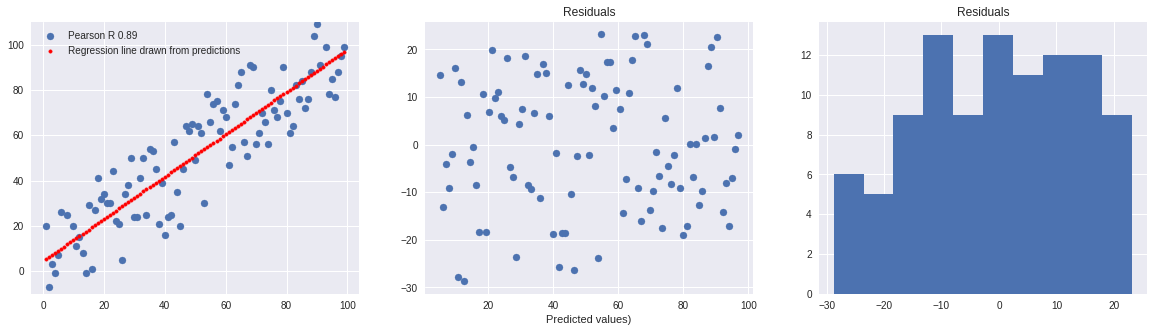

In [0]:
# Inference from linear model
X = np.arange(1,100)
dy = np.random.randint(-25,25,99)
y = X + dy
R, p_value = stats.pearsonr(X,y)
print("P value for entire regression %s " % p_value)
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.scatter(X,y,label="Pearson R %s" % np.round(R,2))
print("R = %s, R squared = %s " % (np.round(R,2), np.round(R**2,2)))

# Make linear model
reg = linear_model.LinearRegression()
fitted_model = reg.fit(X.reshape(-1,1),y)
print("Equation of regression line: y = %sx + %s" % (fitted_model.coef_,fitted_model.intercept_))
#Generate predictions from this model and draw regression line
y_pred = reg.predict(X.reshape(-1,1))
plt.scatter(X,y_pred,color='r',label='Regression line drawn from predictions',marker='.')

#Find parameters of regression line
b1, b0 = np.polyfit(X,y,1) # find y = b1x + b0 of regression line


# Performance metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

# Print inference
df = pd.DataFrame({"X":X,"y":y})
model = ols("y ~ X",df).fit() # Ordinary least sqaures model
print(model.summary())

plt.ylim(-10,110)
plt.legend(loc='best')

plt.subplot(132)
plt.scatter(model.fittedvalues,model.resid)
plt.xlabel('Predicted values)')
plt.title('Residuals')

plt.subplot(133)
plt.hist(model.resid)
plt.title('Residuals')
plt.show()

#### Residuals

The following is plot only of the residuals (i.e. observed - expected) . This should be a random distribution about zero, for linear models to work.

In [0]:
# Define data
@interact
def plot_residuals(randomness=(0.1,1,0.1)):
  X = np.arange(1,100)
  dy = np.random.randint(np.floor(-20/(1/randomness)),np.floor(20/(1/randomness)),99)
  y = X + dy
  R, p_value = stats.pearsonr(X,y)

  plt.figure(figsize=(20,5))
  plt.subplot(121)
  plt.scatter(X,y,label="Pearson R %s" % np.round(R,2))

  #Find parameters of regression line
  m, c = np.polyfit(X,y,1) # find y = mx + c of regression line
  print("Slope %s, intercept %s" % (m,c))

  #Draw regression line from equation

  plt.plot(X,m*X+c,color='r',label='Regression line drawn from equation',marker='.')
  plt.legend(loc='best')
  plt.title('Original data')
  # Draw residuals
  plt.vlines(X,m*X+c,X+dy,color='k')

  plt.subplot(122)
  plt.ylim(-50,50)
  plt.title('Residuals')
  sns.residplot(X,y)


interactive(children=(FloatSlider(value=0.5, description='randomness', max=1.0, min=0.1), Output()), _dom_clas…

If original data had a pattern other than linear, it will also be there in residuals. The following shows 'variable variance'. i.e. fanned out data.

In [0]:
# Regression line and residuals
# Fanned out data - variable variance
@interact
def residual_fanned_data(fanning=(0.1,1,0.1)):
  X = np.arange(1,100)
  dy = []
  for k in X:
    dy.append(np.random.randint(np.floor(-k/(1/fanning)),np.floor(k/(1/fanning)),1).tolist()[0])
  y = X + dy
  m,c = np.polyfit(X,y,1)
  plt.figure(figsize=(20,5))
  plt.subplot(121)
  plt.scatter(X,y)
  plt.plot(X,m*X+c,color='r')
  plt.title('Original data')
  plt.subplot(122)
  sns.residplot(X,y)
  plt.ylim(-50,50)
  plt.title('Residual plot')

interactive(children=(FloatSlider(value=0.5, description='fanning', max=1.0, min=0.1), Output()), _dom_classes…

If original data is anything else other than linear, that will show up in residuals.

In [0]:
# Original data is quadratic
# Regression line and residuals
# Fanned out data - variable variance
@interact
def non_linear_data(k=(20,100,10),power=(2,8,1)):
  X = np.arange(1,100)
  dy = np.random.randint(-30**power,30**power,99)
  y = (X-k)**power + dy
  m,c = np.polyfit(X,y,1)

  plt.figure(figsize=(20,5))
  plt.subplot(1,2,1)
  plt.title("Original data")
  plt.scatter(X,y)
  plt.plot(X,m*X+c,color='r')
  plt.subplot(1,2,2)
  plt.title("Residuals")
  sns.residplot(X,y)

interactive(children=(IntSlider(value=60, description='k', min=20, step=10), IntSlider(value=5, description='p…

#### Partitioning variability between model and residuals

In [0]:
@interact
def partition_variability(linear_variability=(0.1,1,0.1),other_variability=(1,10,1)):
  n = 100
  X = np.arange(1,n)
  dy = np.random.randint(-other_variability,other_variability,n-1)
  y = linear_variability*X + dy
  pearsonR,_ = stats.pearsonr(X,y)
  plt.scatter(X,y,label='R %s R sq %s' % (np.round(pearsonR,3),np.round(pearsonR**2,3)))
  plt.ylim(-10,110)
  m,c = np.polyfit(X,y,1)
  y_preds = m*X + c
  plt.plot(X,y_preds,color='r',label='Linear variability')
  plt.vlines(x=n/2,ymin=m*n/2+c-other_variability,ymax=m*n/2+c+other_variability,color='g',label='Other variability')
  
  #residuals
  res = y - y_preds

  # squared error of residuals
  sq_res = np.sum(res**2)

  # mean squared error of residuals
  mse = sq_res/ n

  # root mean squared error
  rmse = np.sqrt(mse)

  # sum of square of residuals
  ssr = np.sum(res**2)

  #  total sum of squares
  sst = np.sum((y - np.mean(y))**2)

  # R squared
  rsq = 1 - (ssr/sst)
  
  plt.legend(loc='best')
  plt.show()
  print("Mean squared error of residuals %s" % mse)
  print("Sum squared error of residuals %s" % ssr)
  print("Sum squared error total %s" % sst)
  print("R squared (1 - ssr/sst) %s" % rsq)

interactive(children=(FloatSlider(value=0.5, description='linear_variability', max=1.0, min=0.1), IntSlider(va…

### Multiple regression

The equation

$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 ... \beta_k x_k $

describes a hyperplane in k-dimensional space, where k is number of predictor variables.



This data describes two independent variables (x1,x2), and one dependent variable y.

|x1 |x2 |y  |
|---|---|---|
|3.4|5.6|0.3|
|3.9|5.8|0.4|
|4.2|5.1|0.3|
|3.1|4.1|0.5|
|4.7|5.3|0.4|

R squared: 0.3461518313179376
Coeffiients of x1 and x2: [ 0.05646309 -0.09782163]
Intercept: 0.6887684987121839


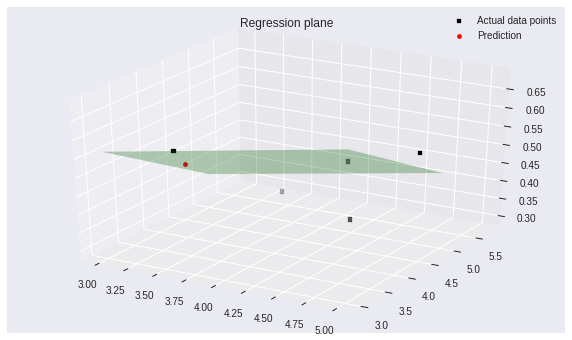

In [0]:
# Multiple regression with two numeric variables
# Open this is native machine python with %matplotlib tk
from mpl_toolkits.mplot3d import Axes3D
data = np.asarray([[3.4,5.6,0.3],[3.9,5.8,0.4],[4.2,5.1,0.3],[3.1,4.1,0.5],[4.7,5.3,0.5]])
X = data[:,:2]
y = data[:,2]
reg = linear_model.LinearRegression().fit(X,y)
print("R squared: %s" % reg.score(X,y))
print("Coeffiients of x1 and x2: %s" % reg.coef_)
print("Intercept: %s" % reg.intercept_)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],y,marker='s',color='k',label='Actual data points')
x1s,x2s = np.meshgrid(np.linspace(3,5,1000),np.linspace(3,5,1000))
y_preds = reg.intercept_ + x1s*reg.coef_[0] + x2s*reg.coef_[1]
ax.plot_surface(x1s,x2s,y_preds,color='g',alpha=0.3)
x_pred = np.asarray([[3.2,4.1]])
y_pred = reg.predict(x_pred)
ax.scatter(3.2,4.1,y_pred,color='r',label="Prediction")
plt.title("Regression plane")
plt.legend(loc='best')
plt.show()

Let's examine a real dataset.

#### Collinearity and screeplots
This table describes a response variable, 'SEPSIS', and a number of predictor variables. Note there is a categorical predictor variable, 'SMOKER' (Categories: None/ Occasional/ Moderate/ High).
There is a need to visualise between __every pair__ of variables (a screeplot), to exclude collinearity of variables (i.e. if two variables are actually not independent)

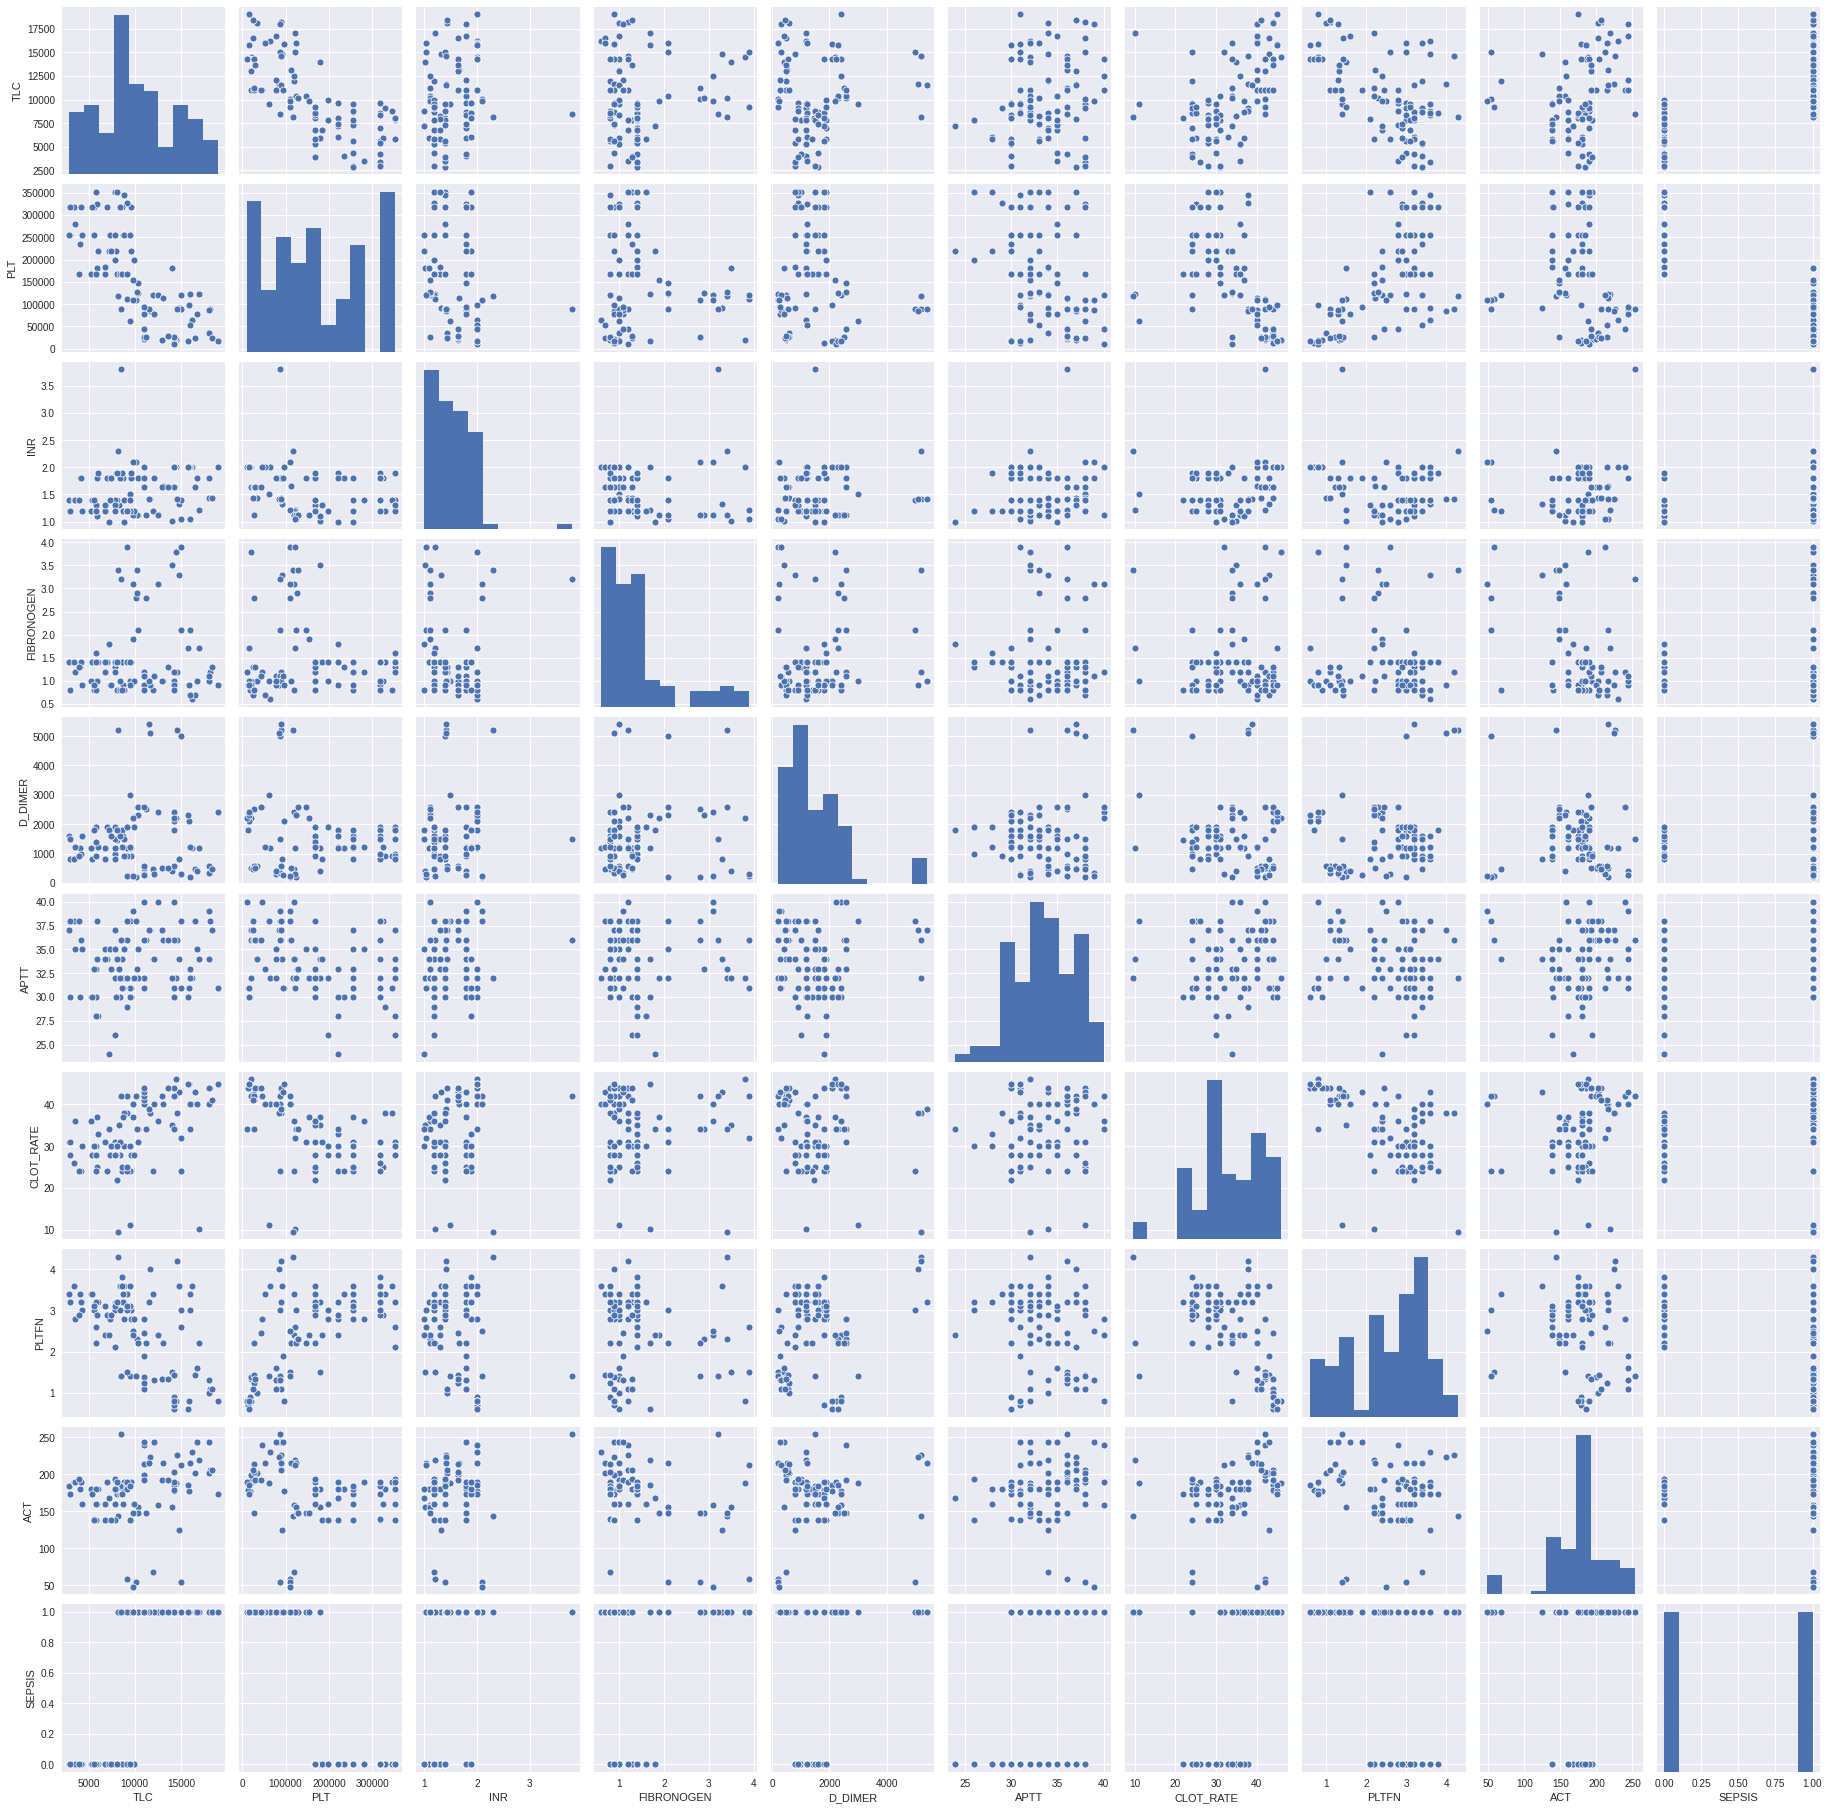

In [0]:
sns.pairplot(sepsis_data) #Note that this plot includes individual data histograms too

We can color the data points according to which ones had SEPSIS=1

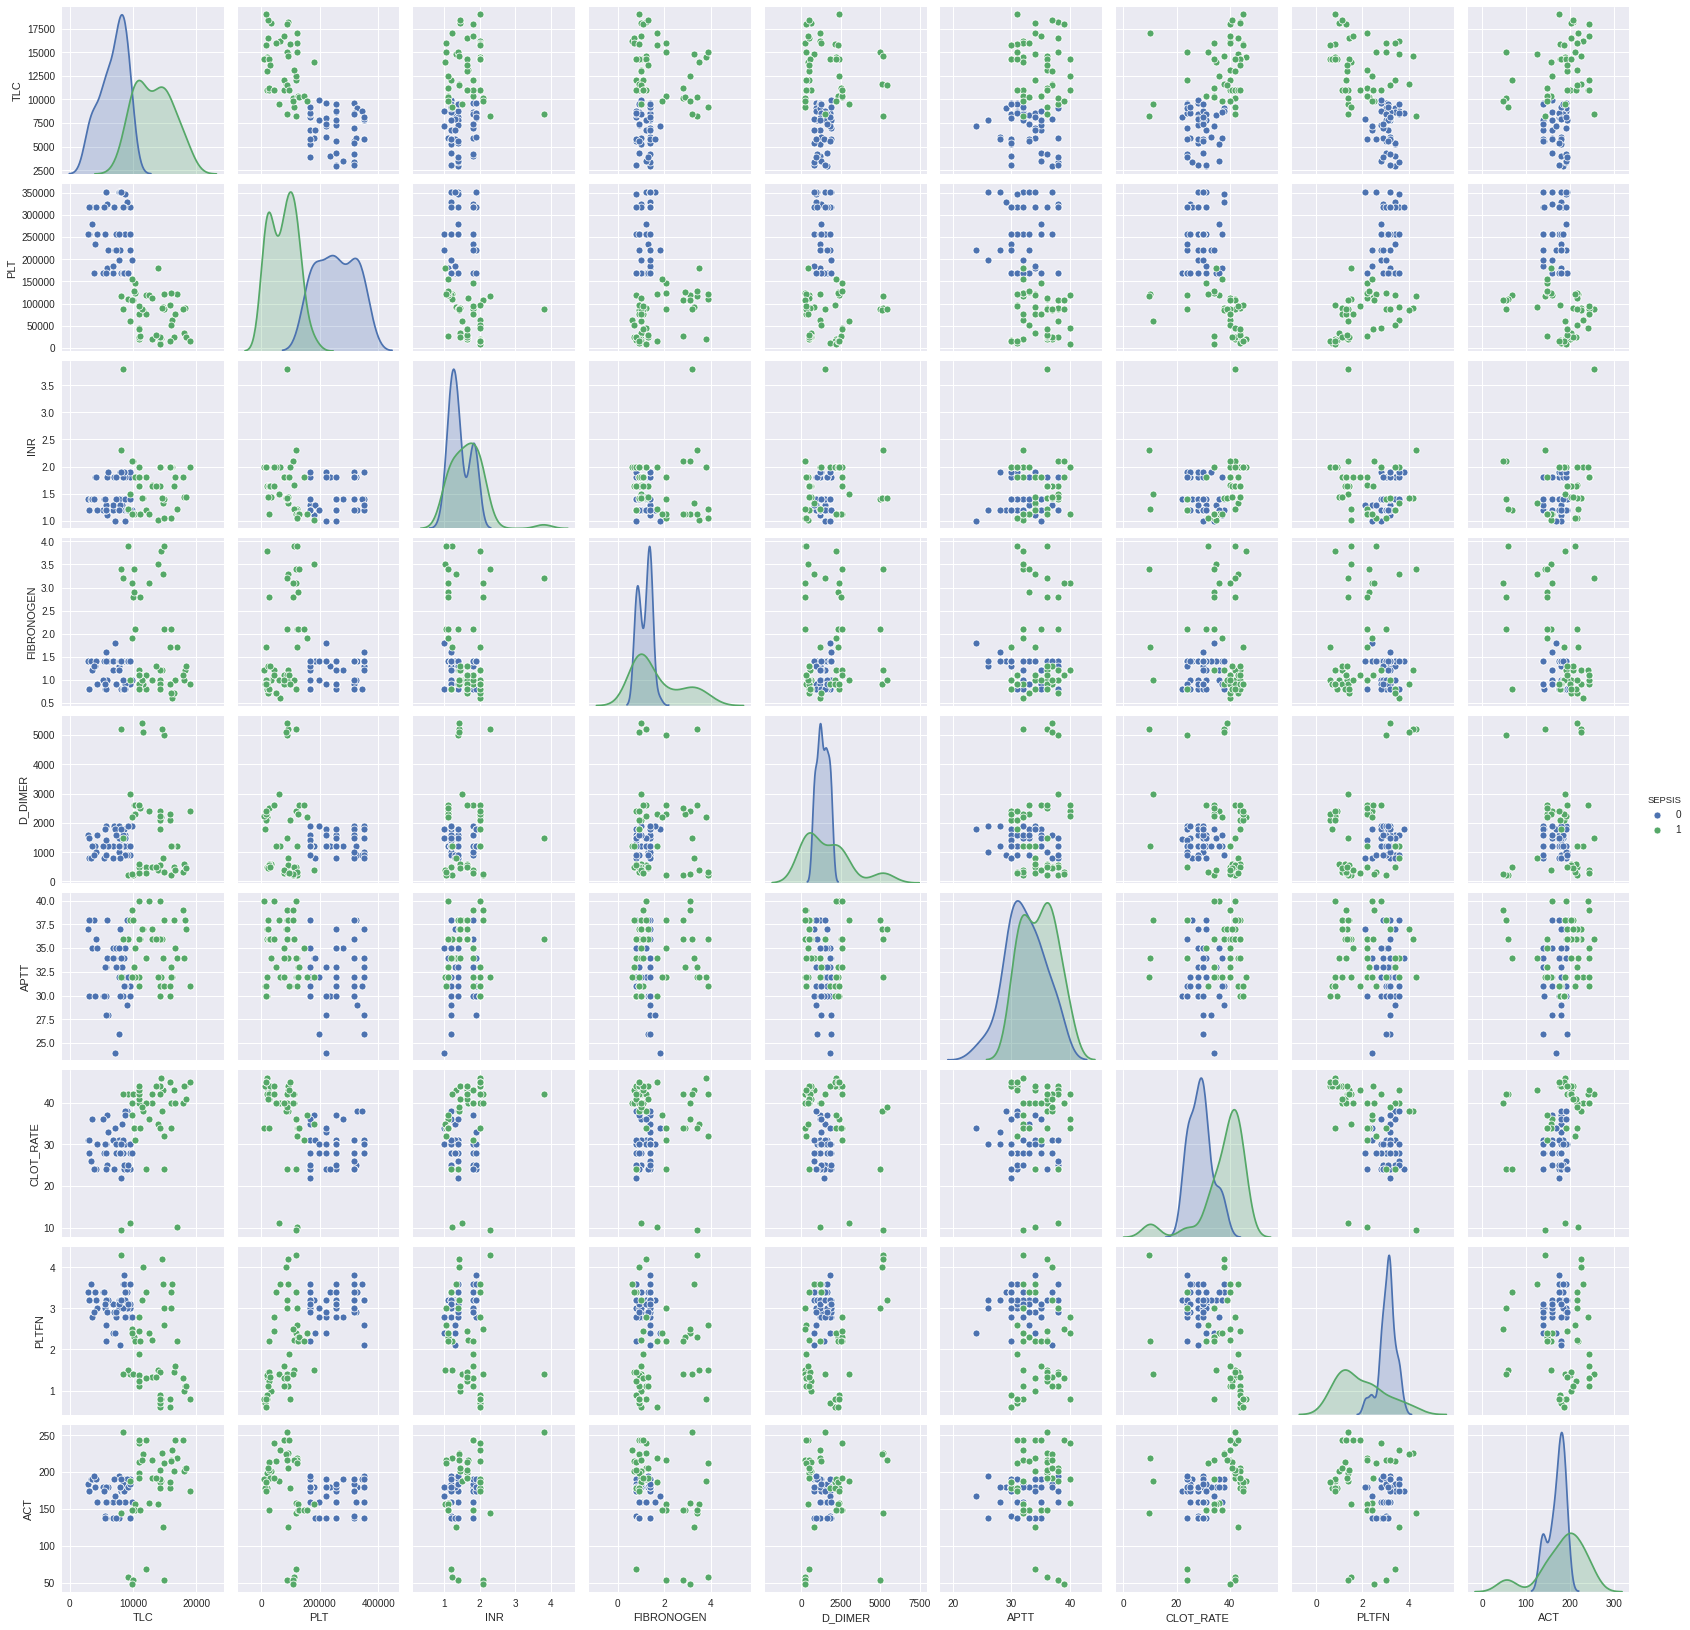

In [0]:
sns.pairplot(sepsis_data,hue='SEPSIS')

### Inference from multiple regression

Now, the null hypothesis is simply that - none of the predictor variables are related to response, i.e.

$ H_0 : \beta_1 = \beta_2 ... = \beta_k = 0 $

And the alternative, is at least one of them is non zero. To confirm that the model as a __whole__ (i.e. combination of the predictor variables) have some relation to the response variable, we perform ANOVA on the linear model. We will try to predict 'TLC' from three other variables.

In [0]:
# Fit the model
model = ols("TLC ~ PLTFN + APTT + CLOT_RATE", sepsis_data).fit()
# Print the summary
print(model.summary())

# Peform analysis of variance on fitted linear model
anova_results = anova_lm(model)
print('\nANOVA results')
print(anova_results)

                            OLS Regression Results                            
Dep. Variable:                    TLC   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     19.71
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           4.90e-10
Time:                        07:27:56   Log-Likelihood:                -947.80
No. Observations:                 100   AIC:                             1904.
Df Residuals:                      96   BIC:                             1914.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6975.7534   4204.881      1.659      0.1

The overall F=57.56 (p = 1.42e-24) indicates __at least__ one of the predictor variables are significantly related to response. However, this overall F statistic does not indicate goodness of fit. The last part of the output, __ANOVA results__, gives the statistics for individual predictor variables.

Looking at the individual slopes and intercepts, inference can be made in a way similar to simple regression. Only that degree of freedom, in this case, is (n - 1 - k). Also, looking into individual p-values of predictors, one can iteratively selected a model with predictor variables having lowest p values.

#### Checking residuals in a multiple regression

First we plot the residuals of the model as a whole

Text(0.5, 1.0, 'Histogram of residuals')

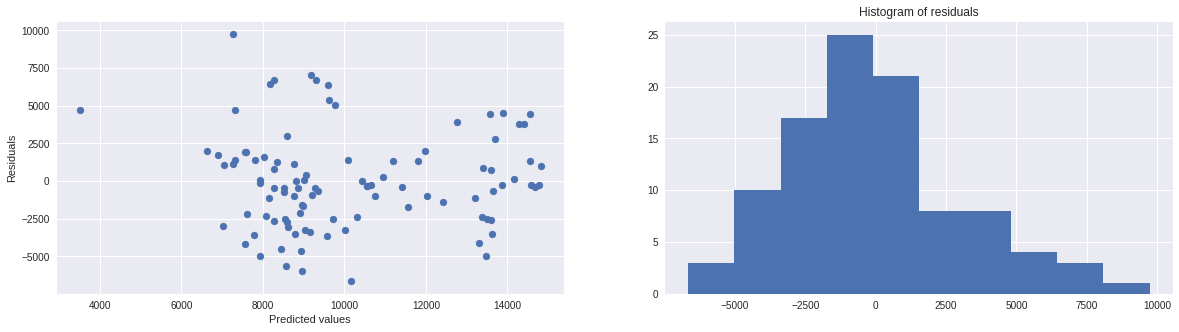

In [0]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.scatter(model.fittedvalues,model.resid)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.subplot(122)
plt.hist(model.resid)
plt.title('Histogram of residuals')

Clearly, these residuals are not randomly distributed around zero, but have a vague pattern of their own.

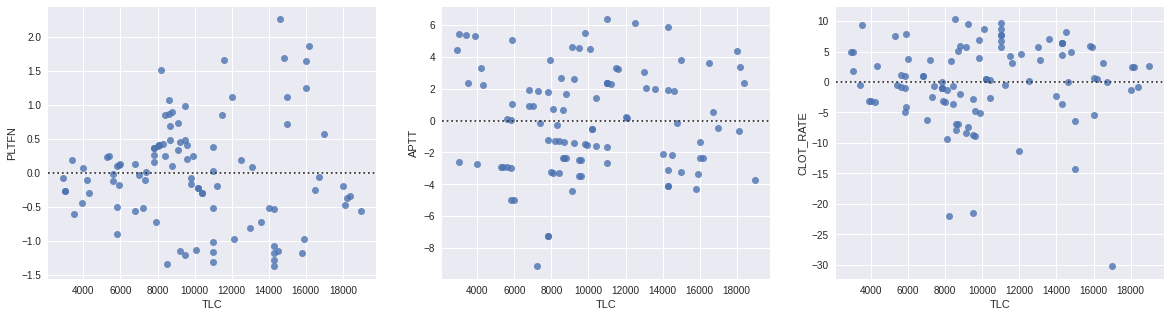

In [0]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.residplot('TLC','PLTFN',sepsis_data)
plt.subplot(132)
sns.residplot('TLC','APTT',sepsis_data)
plt.subplot(133)
sns.residplot('TLC','CLOT_RATE',sepsis_data)

# Machine learning models

Prediction models are used for classification (categorical variables) and regression (continuous variables). 

## k nearest neighbours

This is the simplest: predict from nearest data points. Hwever,

* A metric of what we mean by 'distance' between data points has to be specified. The usual distance function applied is just plain old Euclidean distance.

* How to select the category of a point from its nearest _k_ points has to be specified. Usually, it's the majority vote.




In [0]:
sepsis_data.head()

,TLC,PLT,INR,FIBRONOGEN,D_DIMER,APTT,CLOT_RATE,PLTFN,ACT,SMOKER,SEPSIS
0,14800,92000,1.32,3.3,800,34,43.0,3.6,125,N,1
1,17000,122000,1.22,1.7,1200,34,10.1,2.2,219,O,1
2,15000,88000,1.40,2.1,5000,38,24.0,3.0,54,M,1
3,9500,62000,1.50,1.0,3000,38,11.2,1.4,188,H,1
4,12000,120000,1.20,0.8,480,34,24.0,3.4,68,H,1


We'll try to predict the 'SMOKER' category (whether somebody is a non, occasional, moderate or heavy smoker) from rest of the numeric variables. We do a basic scatterplot of two variables, 'TLC' and 'PLTFN' and color the points according to 'SMOKER' category. For this exercise, we select only first 20 rows.

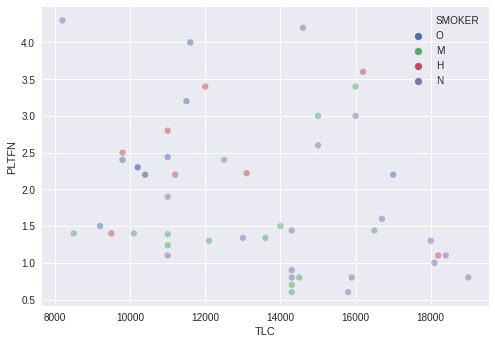

In [0]:
reduced_data = sepsis_data.iloc[1:50]
sns.scatterplot('TLC','PLTFN',data=reduced_data,hue='SMOKER',alpha=0.5,edgecolors='k')

The scatter does not look very promising: all is mixed up. We don't expect kNN to work very well in this case.

In [0]:
# Separate training and test data
X = reduced_data[['TLC','PLTFN']]
y = reduced_data[['SMOKER']]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [0]:
# Train a KNN model with 01 neighbors
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, np.ravel(y_train))

# Evaluate on test set
knn.score(X_test,np.ravel(y_test))

0.15384615384615385

As expected, the accuracy on test set is just 0.15. We now try to plot the decision boundaries.

In [0]:
def decision_boundary_knn(X,y, knn_model,cdict, x1_incr, x2_incr):
  # X and y are pandas dataframes, cdict is a dictionary of categories to numbers, i.e. {'N':1,'P':2 etc}
  # Only 2d plots, i.e X can have max 2 predictor variables
  #x1_incr is the increment step in x axis, x2_incr in y axis

  # Convert X to numpy array
  X_arr = X.to_numpy()
  # Plotting decision regions
  x_min, x_max = X_arr[:, 0].min() - 1, X_arr[:, 0].max() + 1
  y_min, y_max = X_arr[:, 1].min() - 1, X_arr[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, x1_incr),np.arange(y_min, y_max, x2_incr))

  Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  #Convert predictions Z to numeric variable

  categorical_z = []
  for row in Z:
    categorical_z_row = []
    for cell in row:
      categorical_z_row.append(cdict[cell])
    categorical_z.append(categorical_z_row)
  categorical_z = np.asarray(categorical_z)
  

  # Convert y values to color list
  categorical_y = []
  for row in y.to_numpy():
    for cell in row:
      categorical_y.append(cdict[cell])
  categorical_y = np.asarray(categorical_y)
  
  plt.contourf(xx, yy, categorical_z, alpha=0.2,cmap='Accent')
  plt.scatter(X_arr[:,0],X_arr[:,1],c=np.ravel(categorical_y),cmap='Accent',edgecolors='k',alpha=0.7)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


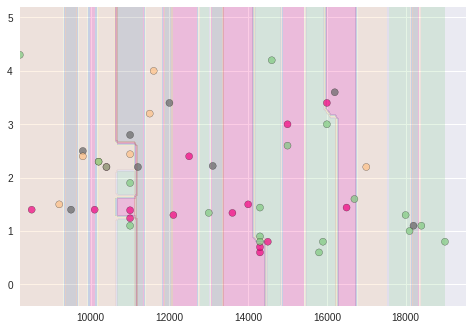

In [0]:
#Plot decision boundaries
reduced_data = sepsis_data.iloc[1:50]
X = reduced_data[['TLC','PLTFN']]
y = reduced_data[['SMOKER']]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

# Train a KNN model with 01 neighbors
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

cdict = {'N':1,'O':2,'M':3,'H':4}
decision_boundary_knn(X,y,knn,cdict,100,0.1)

This is all pretty mixed up. Let's try with k=3.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


Accuracy of knn3 0.23076923076923078


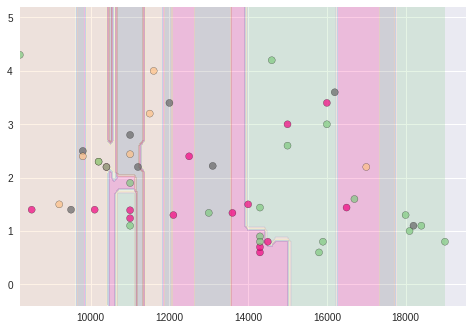

In [0]:
X = reduced_data[['TLC','PLTFN']]
y = reduced_data[['SMOKER']]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

# Train a KNN model with 01 neighbors
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)

# Evaluate on test set
print("Accuracy of knn3 %s" % knn3.score(X_test,y_test))

decision_boundary_knn(X,y,knn3,cdict,100,0.1)

Obviously, kNN doesn't work very well in this dataset. Let's try another dataset of smokers.

In [0]:
smokers = pd.read_csv('https://www.dropbox.com/s/2priy24npq9jy2i/smoker_knn_data.csv?dl=1')
smokers.head()

,Cholesterol,FEV1,Smoker
0,175,47,H
1,182,40,H
2,183,43,H
3,177,35,H
4,180,40,H


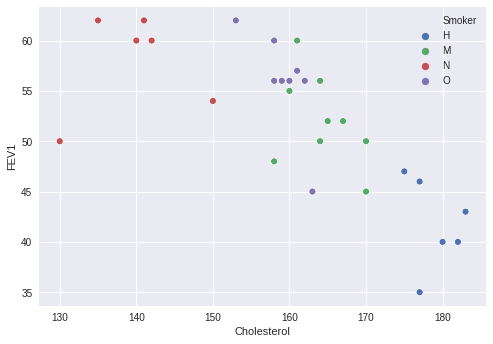

In [0]:
X = smokers[['Cholesterol','FEV1']]
y = smokers[['Smoker']]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

sns.scatterplot('Cholesterol','FEV1',data=smokers,hue='Smoker')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


Accuracy of knn1 0.375
Accuracy of knn3 0.5
Accuracy of knn5 0.5


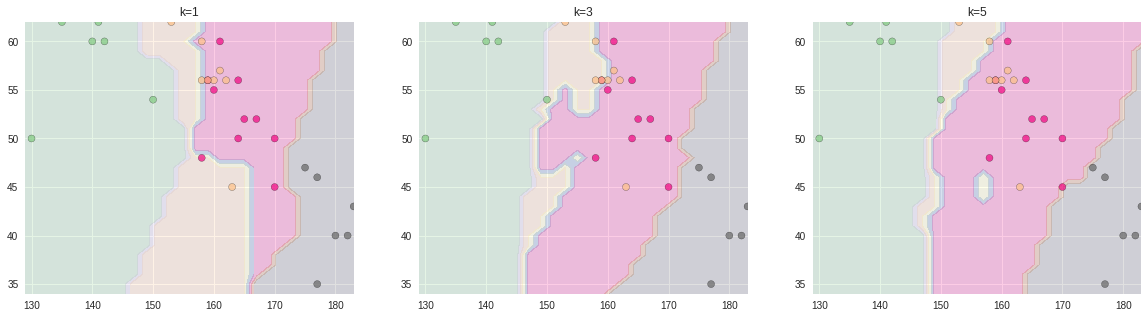

In [0]:
# Train a KNN model with 01 neighbors
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train,y_train)

# Evaluate on test set
print("Accuracy of knn1 %s" % knn1.score(X_test,y_test))

# Train a KNN model with 03 neighbors
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train,y_train)

# Evaluate on test set
print("Accuracy of knn3 %s" % knn3.score(X_test,y_test))

# Train a KNN model with 05 neighbors
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train,y_train)

# Evaluate on test set
print("Accuracy of knn5 %s" % knn5.score(X_test,y_test))

plt.figure(figsize=(20,5))
plt.subplot(131)
decision_boundary_knn(X,y,knn1,cdict,2,1)
plt.title('k=1')
plt.subplot(132)
plt.title('k=3')
decision_boundary_knn(X,y,knn3,cdict,2,1)
plt.subplot(133)
plt.title('k=5')
decision_boundary_knn(X,y,knn5,cdict,2,1)

### kNN regression

There is no reason that the kNN model can not be used for regression, i.e predicting numeric variables.


In [0]:
reduced_data.head()

,TLC,PLT,INR,FIBRONOGEN,D_DIMER,APTT,CLOT_RATE,PLTFN,ACT,SMOKER,SEPSIS
1,17000,122000,1.22,1.7,1200,34,10.1,2.2,219,O,1
2,15000,88000,1.40,2.1,5000,38,24.0,3.0,54,M,1
3,9500,62000,1.50,1.0,3000,38,11.2,1.4,188,H,1
4,12000,120000,1.20,0.8,480,34,24.0,3.4,68,H,1
5,8200,118000,2.30,3.4,5200,32,9.5,4.3,144,N,1


## Neural networks

The easiest non linear function is the sigmoid

$$ f(x) = \frac {e^x} {1 + e^x} $$

And its derivative is

$$ f'(x)  = \frac {f(x)} {1 - f(x)}$$

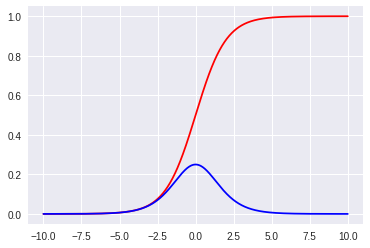

In [0]:
# A sigmoid function
def sigmoid(x, deriv = False):
    if (deriv==True):
        return sigmoid(x)*(1-sigmoid(x))
    return 1/(1 + np.exp(-x))

def all_or_none(x):
    return (x > 0)

x = np.linspace(-10,10,1000)
y1 = sigmoid(x)
y2 = sigmoid(x, deriv=True)
plt.plot(x,y1,'r',label='Sigmoid')
plt.plot(x,y2,'b',label='Derivative of sigmoid')

In [0]:
# Predictor variables
x = np.array([[0,0,1],
    [0,1,1],
    [1,0,1],
    [1,1,1]])

#Response variable
y = np.array([[0],
            [1],
            [1],
            [0]])

np.random.seed(1)

#Set initial values for the network
syn0 = 2*np.random.random((3,4)) - 1
syn1 = 2*np.random.random((4,1)) - 1

# Train the network
for j in range(60000):
    l0 = x #layer 0
    l1 = sigmoid(np.dot(l0,syn0)) #layer 1
    l2 = sigmoid(np.dot(l1,syn1)) #layer 2

    l2_error = y - l2

    if j % 10000 is 0:
        print('Error: %s' % np.mean(np.abs(l2_error)))

    l2_delta = l2_error*sigmoid(l2, deriv=True)
    l1_error = l2_delta.dot(syn1.T)
    l1_delta = l1_error*sigmoid(l1, deriv = True)

    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)

print('Predicted y after training')
print(l2)

Error: 0.4964100319027255
Error: 0.39363752194501
Error: 0.028262568626978235
Error: 0.00985039266802998
Error: 0.005652815880697645
Error: 0.003753950477395237
Output after training
[[0.00249048]
 [0.99689676]
 [0.99714913]
 [0.0022242 ]]
